In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [133]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')



In [134]:
obes_data = data_obesity.iloc[:, 1].values #All rows, 1st column 
diab_data = data_diabetes.iloc[:, 1].values #All rows, 1st column 
inac_data = data_inactivity.iloc[:, 1].values #All rows, 1st column 

In [135]:
q1_inac = np.percentile(inac_data, 25)
q1_obes = np.percentile(obes_data, 25)
q1_diab = np.percentile(diab_data, 25)

median_inac = np.percentile(inac_data, 50)
median_obes = np.percentile(obes_data, 50)
median_diab = np.percentile(diab_data, 50)

q3_inac = np.percentile(inac_data, 75)
q3_obes = np.percentile(obes_data, 75)
q3_diab = np.percentile(diab_data, 75)

iqr_inac = q3_inac - q1_inac
iqr_obes = q3_obes - q1_obes
iqr_diab = q3_diab - q1_diab

lower_bound_inac = q1_inac - 1.5 * iqr_inac
lower_bound_obes = q1_obes - 1.5 * iqr_obes
lower_bound_diab = q1_diab - 1.5 * iqr_diab

upper_bound_inac = q1_inac + 1.5 * iqr_inac
upper_bound_obes = q1_obes + 1.5 * iqr_obes
upper_bound_diab = q1_diab + 1.5 * iqr_diab

for i in ["inac","obes", "diab"]:
    print('\n')
    print("First Quartile for " + i + "\t :", locals()[f"q1_{i}"])
    print("Median for " + i + "\t :", locals()[f"median_{i}"])
    print("Third Quartile for " + i+ "\t :", locals()[f"q3_{i}"])
    print("IQR for " + i+ "\t :", locals()[f"iqr_{i}"])
    print("Lowerbound for " + i+ "\t :", locals()[f"lower_bound_{i}"])
    print("Upper bound for " + i+ "\t :", locals()[f"upper_bound_{i}"])

# outliers = (data < lower_bound) | (data > upper_bound)
# filtered_inactivity_data = data[~outliers]
# This code calculates the five-number summary, computes the IQR, and filters out potential outliers based on a chosen threshold (in this case, 1.5 times the IQR). Adjust the threshold as needed based on the characteristics of your data and your goals for outlier removal.





First Quartile for inac	 : 15.0
Median for inac	 : 16.7
Third Quartile for inac	 : 18.1
IQR for inac	 : 3.1000000000000014
Lowerbound for inac	 : 10.349999999999998
Upper bound for inac	 : 19.650000000000002


First Quartile for obes	 : 17.9
Median for obes	 : 18.3
Third Quartile for obes	 : 19.0
IQR for obes	 : 1.1000000000000014
Lowerbound for obes	 : 16.249999999999996
Upper bound for obes	 : 19.55


First Quartile for diab	 : 7.3
Median for diab	 : 8.4
Third Quartile for diab	 : 9.7
IQR for diab	 : 2.3999999999999995
Lowerbound for diab	 : 3.7000000000000006
Upper bound for diab	 : 10.899999999999999


In [136]:
inac_column = dataset.iloc[:, 1]  # Extracting the inactivity percentage column
obes_column = dataset.iloc[:, 2]
diab_column = dataset.iloc[:, 3]
# Find outliers indices
outliers_inac = (inac_column < lower_bound_inac) | (inac_column > upper_bound_inac)
outliers_obes = (obes_column < lower_bound_obes) | (obes_column > upper_bound_obes)
outliers_diab = (diab_column < lower_bound_diab) | (diab_column > upper_bound_diab)

# print(outliers_inac)
# print(outliers_obes)
# print(outliers_diab)

all_outliers = outliers_inac | outliers_obes | outliers_diab
# print(all_outliers)

# Remove outliers
filtered_dataset = dataset.loc[~all_outliers]

In [137]:
# X = filtered_dataset.iloc[:, 1:-1].values
# y = filtered_dataset.iloc[:, -1].values

X = dataset.iloc[:, 1:-1].values
X[:, 1] = np.sqrt(X[:, 1])
y = np.log(dataset.iloc[:, -1].values)
# print(X)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [160]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
print("Coefficient for Inactivity (B1):", regressor.coef_[0])
print("Coefficient for Obesity (B2):", regressor.coef_[1])
print(regressor.coef_)

Coefficient for Inactivity (B1): 0.0
Coefficient for Obesity (B2): -2.365360670984361
[ 0.00000000e+00 -2.36536067e+00 -1.94774880e+01  4.26092017e-02
  8.16566145e-01  4.44696628e+00 -5.60869957e-04 -5.02657181e-03
 -7.31926901e-02 -3.71098649e-01]


In [140]:
y_pred_train = regressor.predict(poly_reg.transform(X_train))
y_pred_test = regressor.predict(poly_reg.transform(X_test))
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

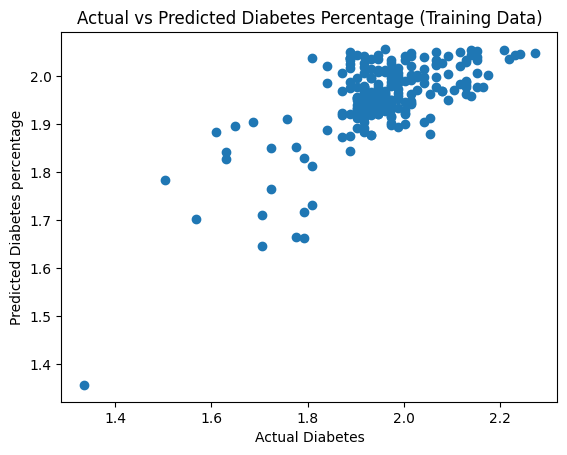

In [141]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [142]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.45777505961306664

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

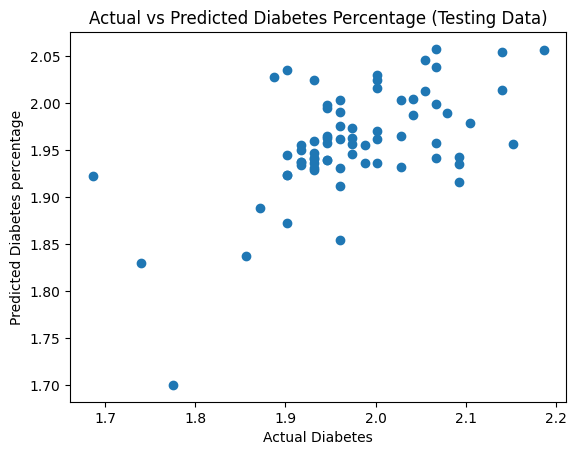

In [143]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [144]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.28443524010818844

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


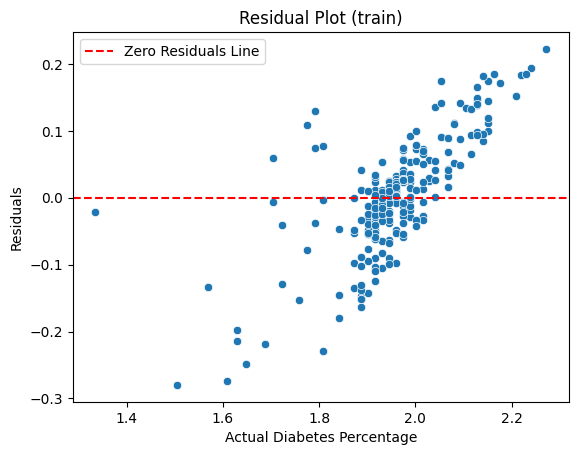

In [149]:
residuals_train = y_train - y_pred_train
sns.scatterplot(x=y_train, y=residuals_train)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot (train)')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


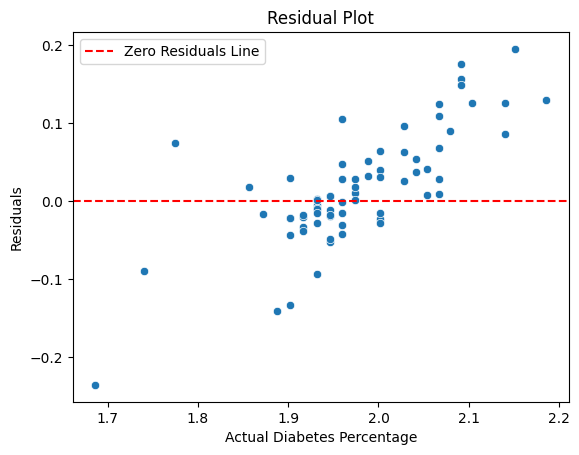

In [150]:
residuals = y_test - y_pred_test
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [151]:
squared_residuals = residuals_train**2
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_train)  # Add a constant term for intercept
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(squared_residuals, X_with_constant)

# Print the results
print("Breusch-Pagan Test Results:")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity (fail to reject null hypothesis)")

Breusch-Pagan Test Results:
P-value: 0.8148856466894271
No evidence of heteroskedasticity (fail to reject null hypothesis)


In [126]:

from sklearn.linear_model import LinearRegression

# Assuming X_test contains the independent variables
squared_regressor = LinearRegression()
squared_regressor.fit(X_test, squared_residuals)

#Why are we testing if the squared residuals can be predicted by the independent variables?
# The Breusch-Pagan test tests the hypothesis that the variance of the errors (residuals) in a regression model is constant across all levels of the independent variables. In other words, it checks for homoskedasticity, which is one of the assumptions of classical linear regression.
#If the variance of the residuals is constant (homoskedasticity), it means that the spread of the residuals is the same across all values of the independent variables. This is a key assumption for the validity of OLS (Ordinary Least Squares) estimates and their associated statistical tests.

# Predict the squared residuals
squared_residuals_pred = squared_regressor.predict(X_test)


In [130]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2


# Null Hypothesis (H0): There is no heteroskedasticity; the variance of the residuals is constant.

# The alternative hypothesis (what you are testing for) would be:

# Alternative Hypothesis (H1): There is heteroskedasticity; the variance of the residuals is not constant.

print(squared_residuals, squared_residuals_pred)

test_statistic = len(X_test) * mean_squared_error(squared_residuals, squared_residuals_pred) / 2
critical_value = chi2.ppf(0.95, df=1)

if test_statistic > critical_value:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity (fail to reject null hypothesis)")
    
print(test_statistic)

# Calculate the p-value
# p_value = 1 - chi2.cdf(test_statistic, df=1)

# # Significance level (alpha)
# alpha = 0.05

# # Compare p-value to significance level
# if p_value <= alpha:
#     print(f"Heteroskedasticity detected (reject null hypothesis) with p-value: {p_value}")
# else:
#     print(f"No evidence of heteroskedasticity (fail to reject null hypothesis) with p-value: {p_value}")

# print("Test Statistic:", test_statistic)


[1.06079641e-03 8.62987525e-03 4.69646979e-04 1.24178637e-04
 9.36553588e-03 8.08448516e-04 8.23213613e-04 1.40934735e-03
 5.59459976e-03 1.44357682e-06 2.64763314e-04 4.11782647e-04
 4.22259818e-03 1.20151150e-02 2.34657303e-04 8.82435757e-04
 1.98642748e-02 2.70864352e-03 2.44702588e-02 3.56824168e-04
 3.10697890e-02 4.01099405e-03 1.74067125e-03 2.90352947e-03
 1.61895909e-03 4.98780350e-05 8.03531870e-04 2.33927866e-03
 7.98207040e-03 3.98011341e-05 1.19096683e-04 6.42333336e-04
 5.26176307e-04 6.51665295e-05 3.82246738e-02 1.12464021e-02
 8.15508654e-04 4.61873892e-04 2.44994903e-05 2.64229314e-03
 1.11739231e-03 2.19005953e-06 3.94390498e-04 1.83883026e-03
 7.22017784e-06 3.08342442e-04 9.68534675e-04 8.06507961e-03
 1.69639644e-02 1.77358677e-02 7.82063507e-05 3.21825316e-04
 9.03559666e-05 2.11118279e-04 1.80626653e-03 9.04499333e-05
 8.30879257e-04 1.60564174e-02 1.65191707e-06 3.56453581e-04
 1.58094021e-02 9.27878248e-04 2.23990966e-02 1.57026254e-02
 2.43721195e-04 4.603847

In [152]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cross_val_r2

array([0.49598772, 0.14079192, 0.33614884, 0.31143659, 0.27570841])

In [153]:
cv_range = np.max(cross_val_r2) - np.min(cross_val_r2)
print("Range of R-squared: ", cv_range)
cv_std = np.std(cross_val_r2)
print("Standard Deviation of R-squared: ", cv_std)
q75, q25 = np.percentile(cross_val_r2, [75 ,25])
cv_iqr = q75 - q25
print("Interquartile Range of R-squared: ", cv_iqr)


Range of R-squared:  0.3551957958808055
Standard Deviation of R-squared:  0.11407387835139352
Interquartile Range of R-squared:  0.060440429073149615
